### Installing and importing the libraries

In [8]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.6/site-packages (0.21.3)


In [9]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [10]:
print(sklearn.__version__)

0.21.3


In [11]:
print(np.__version__)

1.16.4


In [12]:
print(pd.__version__)

0.25.1


### Loading dataset

### Auto-mpg dataset
Source: https://www.kaggle.com/uciml/autompg-dataset

In [13]:
automobile_df = pd.read_csv('datasets/cars.csv')

automobile_df.head(5)

Model   MPG Cylinders Displacement  Horsepower Weight  \
0  chevrolet chevelle malibu  18.0         8          307         130   3504   
1          buick skylark 320  15.0         8          350         165   3693   
2         plymouth satellite  18.0         ?          318         150   3436   
3              amc rebel sst  16.0         8          304         150   3433   
4                ford torino  17.0         8          302         140   3449   

  Acceleration        Year                 Origin  bore  stroke  \
0           12  1970[1975]  US; Detroit, Michigan  3.47    2.68   
1         11.5        1970                    US]  3.47    2.68   
2           11  1970, 1976                     US  2.68    3.47   
3           12        1970                     US  3.19    3.40   
4         10.5   1970-1972                    US]  3.19    3.40   

  compression-ratio  
0                 9  
1                 ?  
2                 9  
3                10  
4                 8

In [14]:
automobile_df.shape

(394, 12)

#### Replace the '?'  value with NaN values

In [15]:
automobile_df = automobile_df.replace('?', np.nan)

automobile_df.head(5)

Model   MPG Cylinders Displacement  Horsepower Weight  \
0  chevrolet chevelle malibu  18.0         8          307         130   3504   
1          buick skylark 320  15.0         8          350         165   3693   
2         plymouth satellite  18.0       NaN          318         150   3436   
3              amc rebel sst  16.0         8          304         150   3433   
4                ford torino  17.0         8          302         140   3449   

  Acceleration        Year                 Origin  bore  stroke  \
0           12  1970[1975]  US; Detroit, Michigan  3.47    2.68   
1         11.5        1970                    US]  3.47    2.68   
2           11  1970, 1976                     US  2.68    3.47   
3           12        1970                     US  3.19    3.40   
4         10.5   1970-1972                    US]  3.19    3.40   

  compression-ratio  
0                 9  
1               NaN  
2                 9  
3                10  
4                 8

In [16]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [17]:
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())

automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [18]:
automobile_df = automobile_df.dropna()

In [19]:
automobile_df.shape

(387, 12)

In [20]:
automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [21]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [22]:
automobile_df.sample(5)

MPG Cylinders Displacement  Horsepower Weight Acceleration  Year  \
326  30.0         4          146          67   3250         21.8  1980   
333  32.4         4          107          72   2290           17  1980   
92   14.0         8          318         150   4237         14.5  1973   
198  18.0         6          250          78   3574           21  1976   
243  36.1         4           98          66   1800         14.4  1978   

             Origin  bore  stroke compression-ratio  
326  Europe-Germany  2.91    3.41               9.2  
333           Japan  3.15    3.58                 9  
92               US  3.15    3.29               9.4  
198              US  3.62    3.15               7.5  
243              US  3.19    3.40                10

In [23]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace=True, axis=1)

automobile_df.head()

MPG Cylinders Displacement  Horsepower Weight Acceleration  \
0  18.000000         8          307         130   3504           12   
3  16.000000         8          304         150   3433           12   
4  17.000000         8          302         140   3449         10.5   
6  14.000000         8          454         220   4354            9   
7  23.551429         8          440         215   4312          8.5   

         Year                 Origin  
0  1970[1975]  US; Detroit, Michigan  
3        1970                     US  
4   1970-1972                    US]  
6  1970[1975]  US; Detroit, Michigan  
7        1970                     US

In [24]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [25]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [26]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand=False)

extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [27]:
automobile_df['Year'].isnull().values.any()

False

In [28]:
automobile_df['Year'] = pd.to_numeric(extr)
automobile_df['Year'].dtype

dtype('int64')

In [29]:
automobile_df.head()

MPG Cylinders Displacement  Horsepower Weight Acceleration  Year  \
0  18.000000         8          307         130   3504           12  1970   
3  16.000000         8          304         150   3433           12  1970   
4  17.000000         8          302         140   3449         10.5  1970   
6  14.000000         8          454         220   4354            9  1970   
7  23.551429         8          440         215   4312          8.5  1970   

                  Origin  
0  US; Detroit, Michigan  
3                     US  
4                    US]  
6  US; Detroit, Michigan  
7                     US

#### Add an age column

In [30]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']

automobile_df.drop(['Year'], axis=1, inplace=True)

automobile_df.sample(5)

MPG Cylinders Displacement  Horsepower Weight Acceleration Origin  Age
192  22.5         6          232          90   3085         17.6     US   43
125  19.0         6          232         100   2901           16     US   45
333  32.4         4          107          72   2290           17  Japan   39
174  19.0         6          232          90   3211           17     US   44
203  28.0         4           97          75   2155         16.4  Japan   43

In [31]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [32]:
automobile_df['Cylinders'].isnull().values.any()

False

In [33]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [34]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [35]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']

cmean = cylinders.astype(int).mean()

In [36]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [37]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [38]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [39]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [40]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors='coerce')

automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [41]:
automobile_df['Origin'].head(15)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
15                       US
16                      US]
17                       US
Name: Origin, dtype: object

In [42]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [43]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 
                                   'US', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [44]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 
                                   'Japan',
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [45]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 
                                   'Europe', 
                                   automobile_df['Origin'])

automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

#### Describe the data

In [46]:
automobile_df.describe()

MPG   Cylinders  Displacement  Horsepower       Weight  \
count  387.000000  387.000000    387.000000  387.000000   387.000000   
mean    23.672514    5.410853    192.184755  103.645995  2965.387597   
std      7.736579    1.667795    103.703706   38.128651   846.332848   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.600000    4.000000    102.500000   75.000000  2221.500000   
50%     23.200000    4.000000    146.000000   92.000000  2790.000000   
75%     29.000000    6.000000    260.000000  121.000000  3589.500000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       Acceleration         Age  
count    387.000000  387.000000  
mean      15.573643   42.917313  
std        2.746260    3.668715  
min        8.000000   37.000000  
25%       13.900000   40.000000  
50%       15.500000   43.000000  
75%       17.050000   46.000000  
max       24.800000   49.000000

In [47]:
automobile_df.to_csv('datasets/cars_processed.csv', index=False)

In [48]:
!ls datasets

GoSales_Tx_LogisticRegression.csv cars_processed.csv
auto-mpg.csv                      diabetes.csv
auto_mpg_processed.csv            diabetes_processed.csv
cars.csv                          diabetes_processed_incomplete.csv


### Visualizing relationships

In [49]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

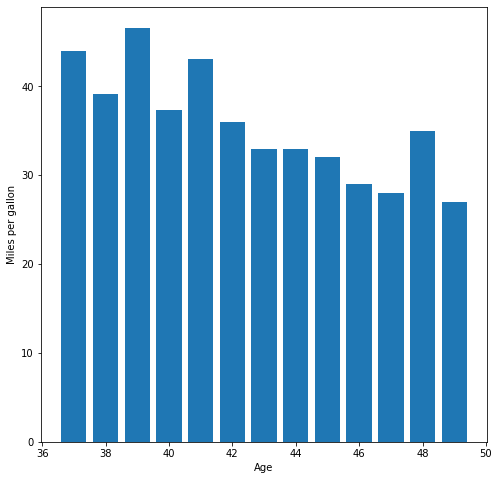

In [50]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

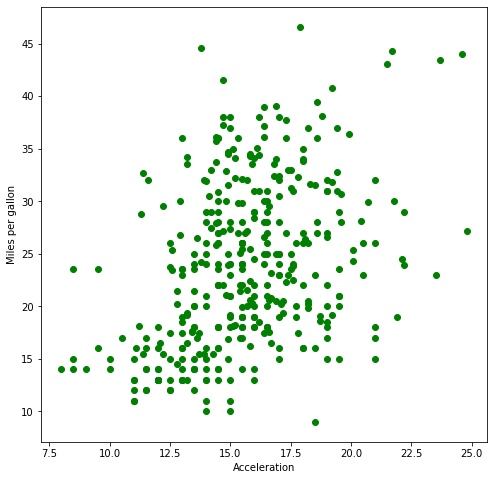

In [51]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

Text(0, 0.5, 'Miles per gallon')

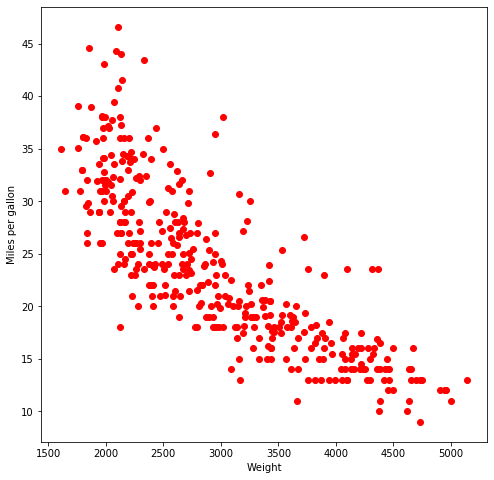

In [52]:
plt.figure(figsize=(8, 8))

plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

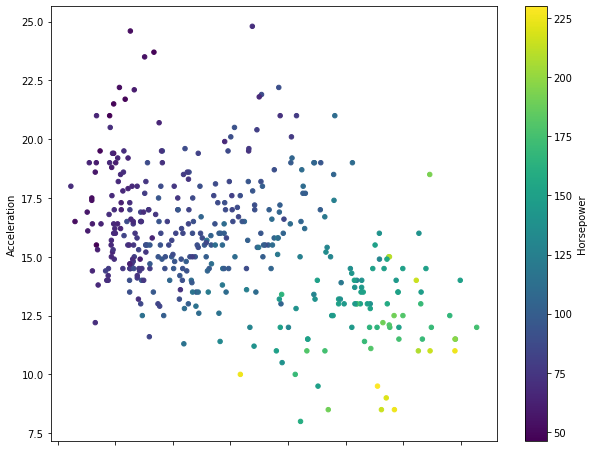

In [53]:
automobile_df.plot.scatter(x='Weight',
                           y='Acceleration',
                           c='Horsepower',
                           colormap='viridis',
                           figsize=(10, 8));

Text(0, 0.5, 'Miles per gallon')

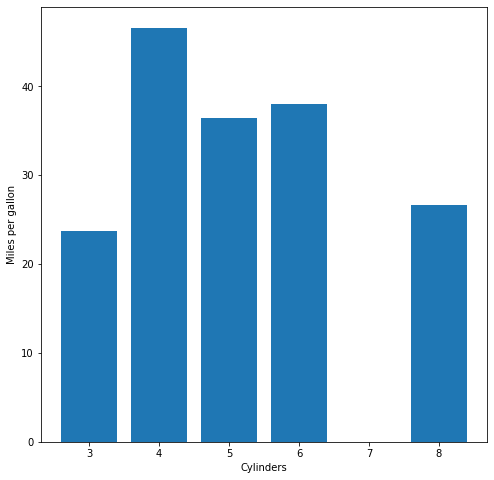

In [54]:
plt.figure(figsize=(8, 8))

plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

#### Histogram

In [55]:
automobile_df.hist(figsize=(15, 8))
plt.show()

##### Next we will use KDE plot and Boxplot so we are dropping cylinders column as these plots can not be use for categorical data.

In [56]:
automobile_df.drop(['Cylinders', 'Origin'], axis=1, inplace=True)

automobile_df.sample(10)

MPG  Displacement  Horsepower  Weight  Acceleration  Age
381  38.000000          91.0          67    1995          16.2   37
81   23.551429         120.0          97    2506          14.5   47
288  15.500000         351.0         142    4054          14.3   40
351  33.700000         107.0          75    2210          14.4   38
347  34.400000          98.0          65    2045          16.2   38
199  18.500000         250.0         110    3645          16.2   43
101  26.000000          97.0          46    1950          21.0   46
57   25.000000          97.5          80    2126          17.0   47
108  21.000000         140.0          72    2401          19.5   46
328  33.800000          97.0          67    2145          18.0   39

#### Plotting Density estimation plot

In [57]:
automobile_df.plot(kind='density', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

#### Plotting Box plot

In [58]:
automobile_df.plot(kind='box', 
                   subplots=True, 
                   layout=(3, 2), 
                   sharex=False, 
                   figsize=(16, 24))

plt.show()

In [59]:
cars_corr = automobile_df.corr()

cars_corr

MPG  Displacement  Horsepower    Weight  Acceleration  \
MPG           1.000000     -0.788492   -0.761499 -0.820138      0.392186   
Displacement -0.788492      1.000000    0.894199  0.932822     -0.526901   
Horsepower   -0.761499      0.894199    1.000000  0.863388     -0.670920   
Weight       -0.820138      0.932822    0.863388  1.000000     -0.397181   
Acceleration  0.392186     -0.526901   -0.670920 -0.397181      1.000000   
Age          -0.566242      0.357047    0.404458  0.299049     -0.292705   

                   Age  
MPG          -0.566242  
Displacement  0.357047  
Horsepower    0.404458  
Weight        0.299049  
Acceleration -0.292705  
Age           1.000000

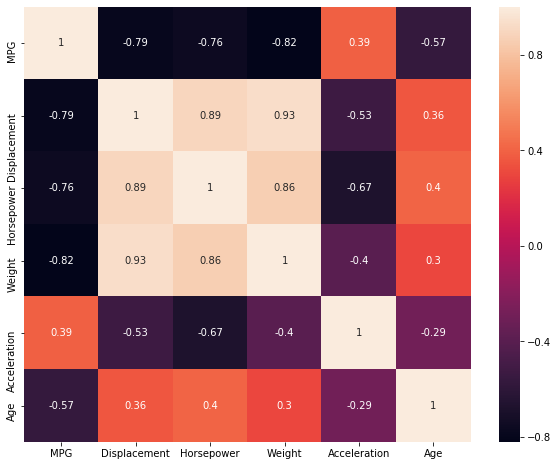

In [60]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(cars_corr, annot = True)